<a href="https://colab.research.google.com/github/raja-khalil/Python-training/blob/main/Reduzacao_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Downloading...
From: https://drive.google.com/uc?id=1MRgmN0LmNeKMIf7T4uCJT_vhFZgbgdW6
To: /content/Design sem nome (8).png
100%|██████████| 5.44M/5.44M [00:00<00:00, 31.5MB/s]


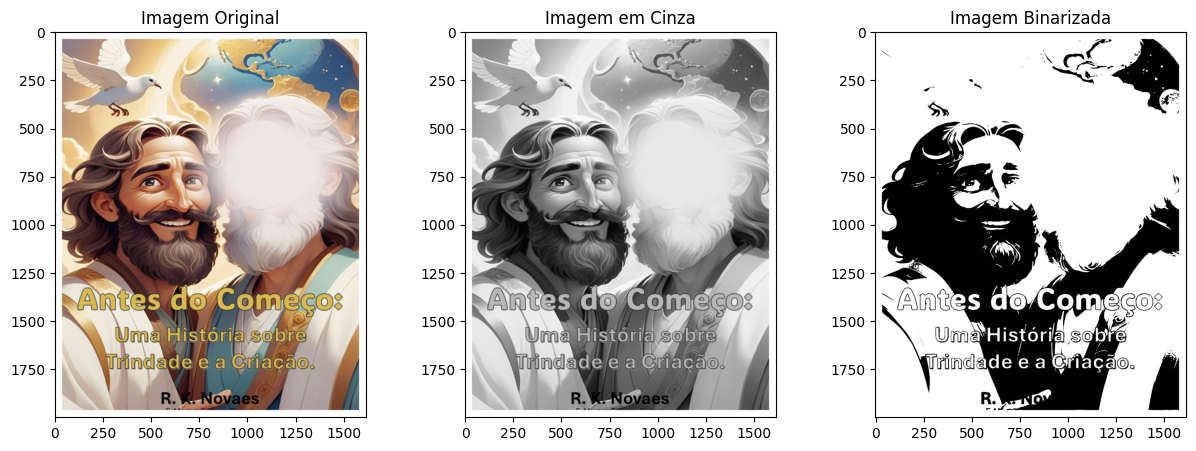

In [8]:
!pip install gdown

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import gdown  # Import gdown

# Função para carregar a imagem a partir do Google Drive
def carregar_imagem(caminho_url):
    """
    Carrega uma imagem a partir de um URL do Google Drive.
    :param caminho_url: str - URL para a imagem.
    :return: np.array - Imagem carregada como array numpy.
    """
    # Extrai o ID do arquivo do URL
    file_id = caminho_url.split('/d/')[1].split('/')[0]

    # Baixa a imagem usando gdown
    gdown.download(id=file_id, quiet=False)

    # Nome do arquivo baixado (gdown usa o nome original do arquivo)
    nome_arquivo = gdown.download(id=file_id, quiet=True)

    # Abre a imagem usando PIL
    imagem = Image.open(nome_arquivo)
    imagem = np.array(imagem)
    return imagem

# Função para converter imagem colorida para níveis de cinza
def converter_para_cinza(imagem):
    """
    Converte uma imagem colorida para níveis de cinza.
    :param imagem: np.array - Imagem colorida.
    :return: np.array - Imagem em níveis de cinza.
    """
    # Usar a fórmula de luminosidade para converter para cinza
    imagem_cinza = np.dot(imagem[..., :3], [0.2989, 0.587, 0.114])
    return imagem_cinza

# Função para binarizar imagem em níveis de cinza
def binarizar_imagem(imagem_cinza, limite=128):
    """
    Binariza uma imagem em níveis de cinza.
    :param imagem_cinza: np.array - Imagem em níveis de cinza.
    :param limite: int - Valor de limiar para binarização (0-255).
    :return: np.array - Imagem binarizada.
    """
    imagem_binaria = (imagem_cinza > limite) * 255
    return imagem_binaria

# Função principal para rodar o módulo
def main():
    """
    Função principal para rodar o módulo de transformação de imagens.
    """
    # URL da imagem no Google Drive
    caminho_url = 'https://drive.google.com/file/d/1MRgmN0LmNeKMIf7T4uCJT_vhFZgbgdW6/view?usp=sharing'

    # Carregar a imagem
    imagem = carregar_imagem(caminho_url)

    # Converter a imagem para níveis de cinza
    imagem_cinza = converter_para_cinza(imagem)

    # Binarizar a imagem
    imagem_binaria = binarizar_imagem(imagem_cinza)

    # Exibir as imagens original, em cinza e binarizada
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Imagem Original')
    plt.imshow(imagem)

    plt.subplot(1, 3, 2)
    plt.title('Imagem em Cinza')
    plt.imshow(imagem_cinza, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Imagem Binarizada')
    plt.imshow(imagem_binaria, cmap='gray')

    plt.show()

# Executar a função principal
if __name__ == "__main__":
    main()

